In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

KeyboardInterrupt: 

In [3]:
os.getcwd()

'C:\\Users\\Dhananjay\\3D Objects\\imarticus PGDA\\Machine learning\\Supervised Learning\\RANDOM FOREST\\HEART'

In [4]:
data=pd.read_csv("heart.csv")
df=data.copy(deep=True)
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


Import Packages
Read Data
Data Preprocessing
3.1 - Data Types and Dimensions
3.2 - Checking for Missing Values
3.3 - Data Correction
3.4 - Statistical Summary
EDA
4.1 - Univariate Analysis
4.2 - Multivariate Analysis
4.3 - Covariance
4.4 - Correlation
Label Encoding of Categorical Data
Standardise Data
Random forest
best Grid
Model Comparision

In [5]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [6]:
nulls=df.isnull().sum()
nulls=nulls[nulls>0]
nulls
nidx=nulls.index
nidx

Index(['Ca', 'Thal'], dtype='object')

In [7]:
df[df.Ca.isnull()]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
287,288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [8]:
df[df.Thal.isnull()]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
87,88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
266,267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


In [9]:
df.groupby(['ChestPain','Sex','Ca']).size()




ChestPain     Sex  Ca 
asymptomatic  0    0.0    25
                   1.0     2
                   2.0     9
                   3.0     4
              1    0.0    41
                   1.0    32
                   2.0    20
                   3.0    10
nonanginal    0    0.0    26
                   1.0     9
              1    0.0    31
                   1.0    11
                   2.0     2
                   3.0     5
nontypical    0    0.0    11
                   1.0     4
                   2.0     3
              1    0.0    26
                   1.0     4
                   3.0     1
typical       0    0.0     3
                   2.0     1
              1    0.0    13
                   1.0     3
                   2.0     3
dtype: int64

In [10]:
df.groupby(['ChestPain','Sex','Thal']).size()


ChestPain     Sex  Thal      
asymptomatic  0    fixed          1
                   normal        27
                   reversable    12
              1    fixed         11
                   normal        26
                   reversable    66
nonanginal    0    normal        31
                   reversable     3
              1    fixed          2
                   normal        30
                   reversable    19
nontypical    0    normal        18
              1    fixed          2
                   normal        21
                   reversable     9
typical       0    normal         4
              1    fixed          2
                   normal         9
                   reversable     8
dtype: int64

In [11]:
df.loc[166,'Ca']=0.0
df.loc[192,'Ca']=0.0
df.loc[287,'Ca']=0.0
df.loc[302,'Ca']=0.0


In [12]:
df.loc[87,'Thal']='normal'
df.loc[266,'Thal']='reversable'

In [13]:
df.Thal.value_counts()

normal        167
reversable    118
fixed          18
Name: Thal, dtype: int64

In [14]:
df.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [15]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [16]:
df =df.drop('Unnamed: 0',axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder 

In [18]:
cat=df.select_dtypes(include=object)
cat

,ChestPain,Thal,AHD
0,typical,fixed,No
1,asymptomatic,normal,Yes
2,asymptomatic,reversable,Yes
3,nonanginal,normal,No
4,nontypical,normal,No
...,...,...,...
298,typical,reversable,Yes
299,asymptomatic,reversable,Yes
300,asymptomatic,reversable,Yes
301,nontypical,normal,Yes


In [19]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [20]:
lbe=LabelEncoder()

In [21]:
df['ChestPain']=lbe.fit_transform(df['ChestPain'])
df['Thal']=lbe.fit_transform(df['Thal'])
df['AHD']=lbe.fit_transform(df['AHD'])

In [22]:
df[df.Ca.isnull()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD


In [23]:
df.dtypes

Age            int64
Sex            int64
ChestPain      int32
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal           int32
AHD            int32
dtype: object

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

In [47]:
#settin params of RandomForestClassifier
rfc=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

In [1]:

#dataset
y=df['AHD']
x =df.drop('AHD',axis=1)


# splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

#fitting
rfc.fit(x_train,y_train)

#Predicting
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

#Train Results
print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTest Confussion matrix \n",matrix(y_test,test_pred))
print('\n Test classification report \n',report(y_test,test_pred))

print("Random Forest Cross validation score :",rfc.oob_score_)

NameError: name 'df' is not defined

In [50]:
#df_feature_imp[df_feature_imp[df_feature_imp.Imp>=0.05].index]


# Hyperparameter Tuning with GRID SEARCH

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# model setting
rfcg=RandomForestClassifier(random_state=40,n_jobs=-1,oob_score=True)

In [53]:
# hyperparameters setting
params={ 'max_depth':[5,10,15,20,30],'min_samples_leaf':[10,15,20,25,100,150],'n_estimators':[10,20,25,40,100,200]}

In [54]:
#GD search setting
gd_search=GridSearchCV(estimator=rfcg, param_grid=params, cv=4, n_jobs=-1, verbose=True, scoring="accuracy")

In [55]:
# Grid search fitting

gd_search.fit(x_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=40),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 25, 100, 150],
                         'n_estimators': [10, 20, 25, 40, 100, 200]},
             scoring='accuracy', verbose=True)

In [34]:
# best score
gd_search.best_score_

0.8153978696741855

In [43]:
gd_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 20}

In [35]:
# best Hypertuning parameters model
rf_best=gd_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=20,
                       n_jobs=-1, oob_score=True, random_state=40)

In [36]:
#fitting model with best hyperparameters

rf_best=RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=20,
                       n_jobs=-1, oob_score=True, random_state=40)


rf_best.fit(x_train,y_train)

#Predicting
train_pred=rf_best.predict(x_train)
test_pred=rf_best.predict(x_test)

#Train Results
print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTRain Confussion matrix \n",matrix(y_test,test_pred))
print('\n Train classification report \n',report(y_test,test_pred))

print("Random Forest Cross validation score :",rf_best.oob_score_)


 TRain Confussion matrix 
 [[109  16]
 [ 23  79]]

 Train classification report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       125
           1       0.83      0.77      0.80       102

    accuracy                           0.83       227
   macro avg       0.83      0.82      0.83       227
weighted avg       0.83      0.83      0.83       227

 
TRain Confussion matrix 
 [[37  2]
 [ 7 30]]

 Train classification report 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        39
           1       0.94      0.81      0.87        37

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76

Random Forest Cross validation score : 0.7841409691629956


[Text(2232.0, 1189.125, 'Ca <= 0.5\ngini = 0.496\nsamples = 137\nvalue = [103, 124]\nclass = Yes AHD'),
 Text(1116.0, 849.375, 'Oldpeak <= 0.05\ngini = 0.457\nsamples = 83\nvalue = [86, 47]\nclass = No AHD'),
 Text(558.0, 509.625, 'gini = 0.241\nsamples = 31\nvalue = [43, 7]\nclass = No AHD'),
 Text(1674.0, 509.625, 'MaxHR <= 151.0\ngini = 0.499\nsamples = 52\nvalue = [43, 40]\nclass = No AHD'),
 Text(1116.0, 169.875, 'gini = 0.457\nsamples = 25\nvalue = [12, 22]\nclass = Yes AHD'),
 Text(2232.0, 169.875, 'gini = 0.465\nsamples = 27\nvalue = [31, 18]\nclass = No AHD'),
 Text(3348.0, 849.375, 'Ca <= 1.5\ngini = 0.296\nsamples = 54\nvalue = [17, 77]\nclass = Yes AHD'),
 Text(2790.0, 509.625, 'gini = 0.395\nsamples = 28\nvalue = [13, 35]\nclass = Yes AHD'),
 Text(3906.0, 509.625, 'gini = 0.159\nsamples = 26\nvalue = [4, 42]\nclass = Yes AHD')]

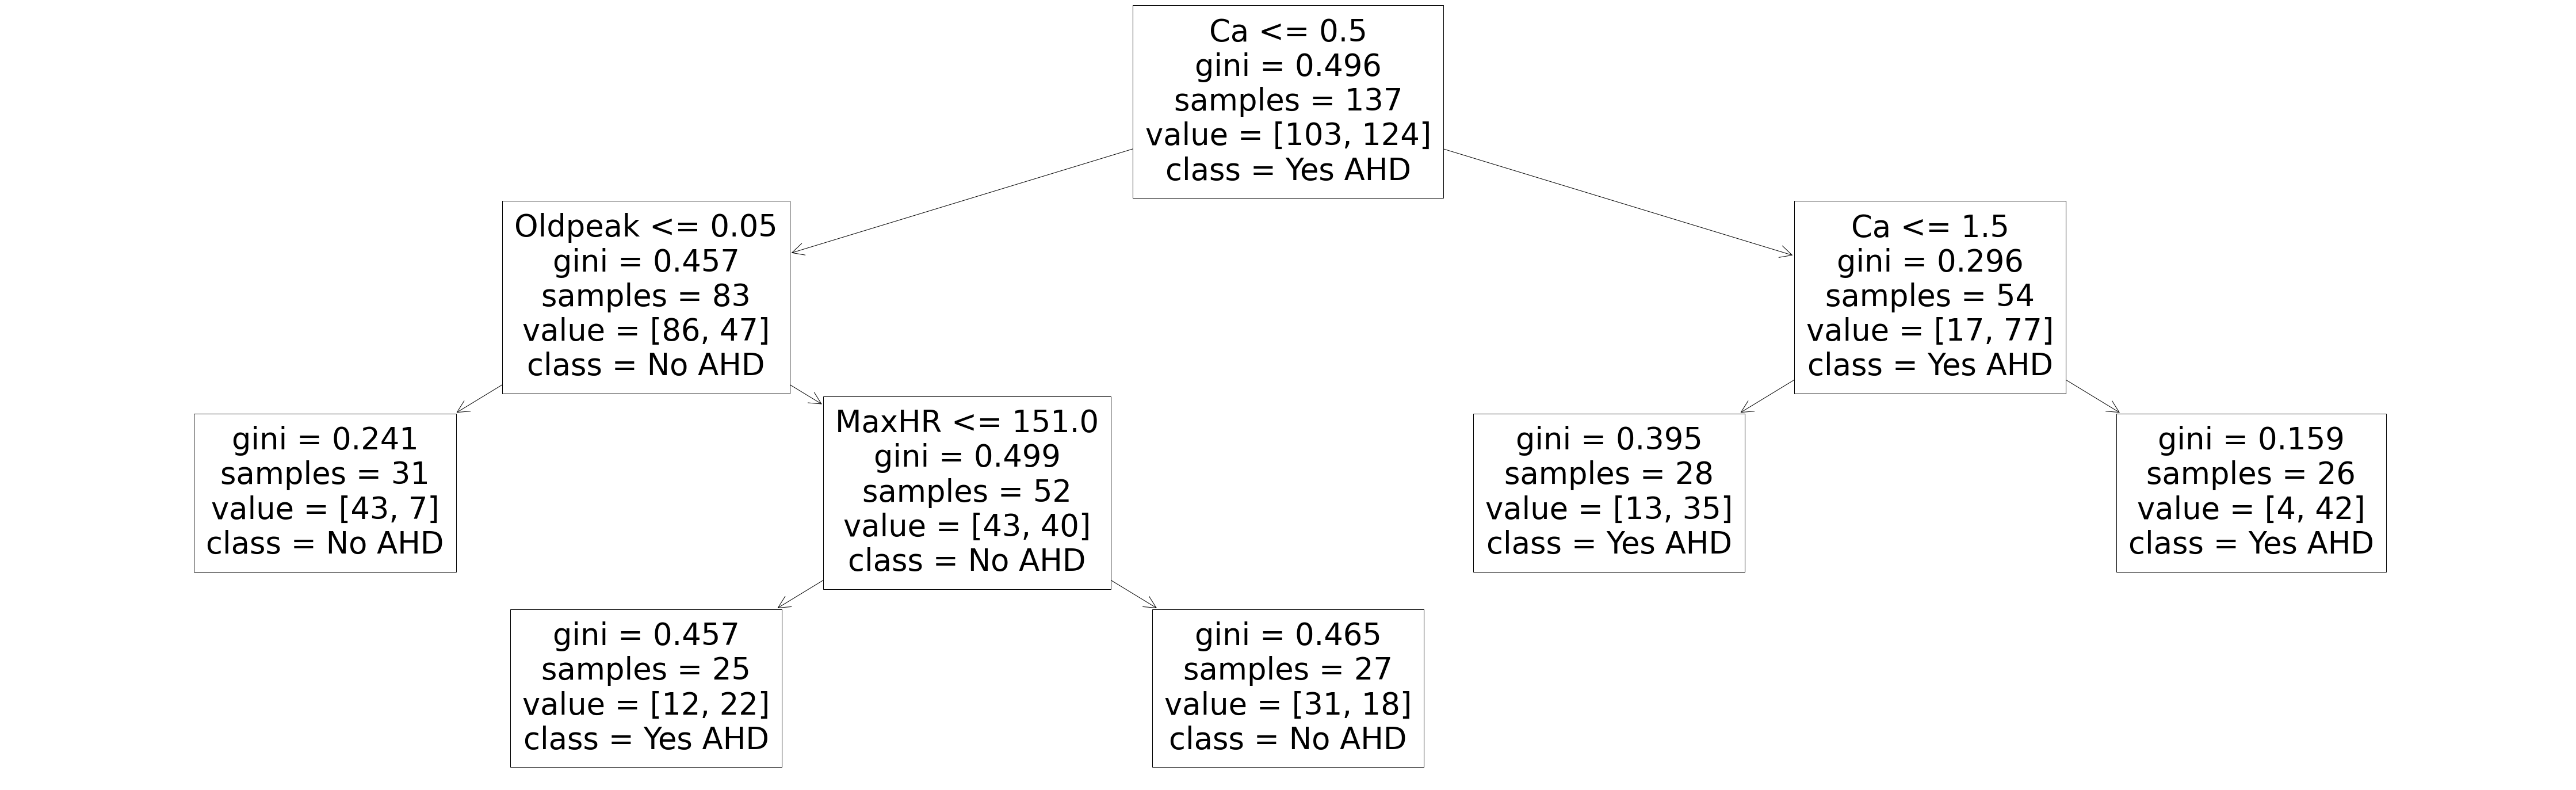

In [351]:
# plotting Tree

from sklearn.tree import plot_tree

plt.figure(figsize=(80,25))
plot_tree(rf_best.estimators_[5],feature_names=x.columns,class_names=['No AHD','Yes AHD'])


In [40]:
rf_best.feature_importances_

array([0.04802573, 0.02131367, 0.27218145, 0.00251729, 0.00619746,
       0.        , 0.00695907, 0.08714748, 0.08199935, 0.13566338,
       0.0404221 , 0.18112833, 0.1164447 ])

In [42]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)
 

,Varname,Imp
2,ChestPain,0.272181
11,Ca,0.181128
9,Oldpeak,0.135663
12,Thal,0.116445
7,MaxHR,0.087147
8,ExAng,0.081999
0,Age,0.048026
10,Slope,0.040422
1,Sex,0.021314
6,RestECG,0.006959


In [65]:
# BUilding RF model with best features

imp_cols=df.columns[imp_df[imp_df['Imp']>0.7].index]
imp_cols

Index([], dtype='object')

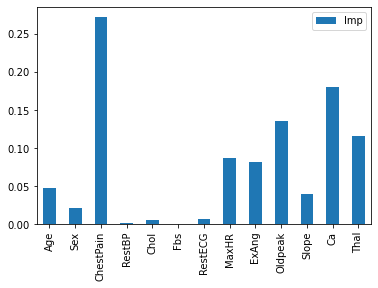

In [75]:
imp_df.plot(kind ='bar')
plt.xticks(ticks=range(len(imp_df.Varname)),labels=list(imp_df.Varname))
plt.show()